In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import os
import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import face_recognition
import cv2
import numpy as np
import glob
from winsound import Beep
import pyfirmata

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

createdataframe(TRAIN_DIR)

happy completed
neutral completed
sad completed
surprise completed


(['images/train\\happy\\100.jpg',
  'images/train\\happy\\10000.jpg',
  'images/train\\happy\\10001.jpg',
  'images/train\\happy\\10005.jpg',
  'images/train\\happy\\10035.jpg',
  'images/train\\happy\\10039.jpg',
  'images/train\\happy\\1004.jpg',
  'images/train\\happy\\10042.jpg',
  'images/train\\happy\\10046.jpg',
  'images/train\\happy\\10050.jpg',
  'images/train\\happy\\1006.jpg',
  'images/train\\happy\\10060.jpg',
  'images/train\\happy\\10066.jpg',
  'images/train\\happy\\10071.jpg',
  'images/train\\happy\\10083.jpg',
  'images/train\\happy\\10092.jpg',
  'images/train\\happy\\10094.jpg',
  'images/train\\happy\\10098.jpg',
  'images/train\\happy\\10102.jpg',
  'images/train\\happy\\10104.jpg',
  'images/train\\happy\\10111.jpg',
  'images/train\\happy\\1012.jpg',
  'images/train\\happy\\10120.jpg',
  'images/train\\happy\\10124.jpg',
  'images/train\\happy\\10135.jpg',
  'images/train\\happy\\10139.jpg',
  'images/train\\happy\\1014.jpg',
  'images/train\\happy\\10140.jpg'

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train.shape)

(20289, 2)


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\happy\10019.jpg     happy
1       images/test\happy\10023.jpg     happy
2       images/test\happy\10074.jpg     happy
3       images/test\happy\10096.jpg     happy
4       images/test\happy\10106.jpg     happy
...                             ...       ...
4972  images/test\surprise\9806.jpg  surprise
4973  images/test\surprise\9830.jpg  surprise
4974  images/test\surprise\9853.jpg  surprise
4975  images/test\surprise\9878.jpg  surprise
4976   images/test\surprise\993.jpg  surprise

[4977 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/20289 [00:00<?, ?it/s]

C:\Users\Lenovo\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/4977 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train

array([0, 0, 0, ..., 3, 3, 3])

In [16]:
y_train = to_categorical(y_train,num_classes = 4)
y_test = to_categorical(y_test,num_classes = 4)

y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(4, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20289, 48, 48, 1), (4977, 48, 48, 1), (20289, 4), (4977, 4))

In [20]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 150, validation_data = (x_test,y_test)) 

Epoch 1/150
159/159 [==============================] - 182s 1s/step - loss: 1.3537 - accuracy: 0.3495 - val_loss: 1.3387 - val_accuracy: 0.3667
Epoch 2/150
159/159 [==============================] - 181s 1s/step - loss: 1.3089 - accuracy: 0.3760 - val_loss: 1.1102 - val_accuracy: 0.5180
Epoch 3/150
159/159 [==============================] - 185s 1s/step - loss: 1.0632 - accuracy: 0.5316 - val_loss: 0.8828 - val_accuracy: 0.6211
Epoch 4/150
159/159 [==============================] - 186s 1s/step - loss: 0.9396 - accuracy: 0.5923 - val_loss: 0.8256 - val_accuracy: 0.6556
Epoch 5/150
159/159 [==============================] - 187s 1s/step - loss: 0.8827 - accuracy: 0.6228 - val_loss: 0.7569 - val_accuracy: 0.6900
Epoch 6/150
159/159 [==============================] - 186s 1s/step - loss: 0.8434 - accuracy: 0.6452 - val_loss: 0.7413 - val_accuracy: 0.6950
Epoch 7/150
159/159 [==============================] - 189s 1s/step - loss: 0.8138 - accuracy: 0.6598 - val_loss: 0.7292 - val_accuracy:

159/159 [==============================] - 170s 1s/step - loss: 0.2899 - accuracy: 0.8935 - val_loss: 0.6862 - val_accuracy: 0.7730
Epoch 114/150
159/159 [==============================] - 170s 1s/step - loss: 0.2904 - accuracy: 0.8895 - val_loss: 0.6913 - val_accuracy: 0.7724
Epoch 115/150
159/159 [==============================] - 171s 1s/step - loss: 0.2838 - accuracy: 0.8955 - val_loss: 0.7023 - val_accuracy: 0.7724
Epoch 116/150
159/159 [==============================] - 171s 1s/step - loss: 0.2919 - accuracy: 0.8937 - val_loss: 0.6949 - val_accuracy: 0.7617
Epoch 117/150
159/159 [==============================] - 171s 1s/step - loss: 0.2854 - accuracy: 0.8924 - val_loss: 0.6774 - val_accuracy: 0.7748
Epoch 118/150
159/159 [==============================] - 170s 1s/step - loss: 0.2791 - accuracy: 0.8978 - val_loss: 0.6834 - val_accuracy: 0.7707
Epoch 119/150
159/159 [==============================] - 169s 1s/step - loss: 0.2878 - accuracy: 0.8928 - val_loss: 0.6883 - val_accuracy:

In [21]:
model.save("E:/AMIT/model1.h5")

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
loaded_model = load_model("E:/AMIT/model.h5")

In [22]:
label = ['happy','neutral','sad','surprise']

In [23]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [24]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\Lenovo\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 191ms/step
model prediction is  sad


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 40ms/step
(1, 48, 48, 1)
model prediction is  sad
(1, 48, 48, 1)


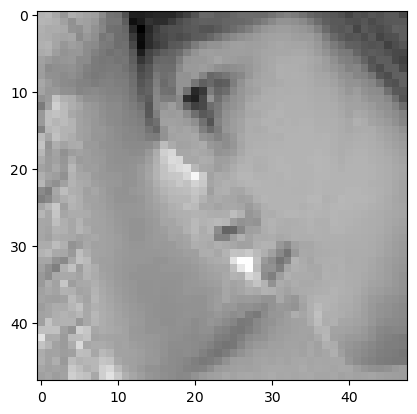

In [52]:
image = 'images/images/validation/sad/1549.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
print(img.shape)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
print(img.shape)

original image is of happy
1/1 [==============================] - 0s 40ms/step
model prediction is  happy


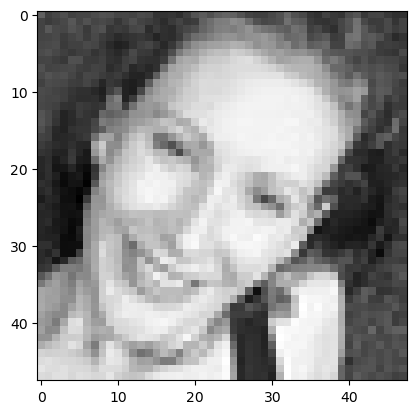

In [57]:
image = 'images/images/validation/happy/553.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 37ms/step
model prediction is  surprise


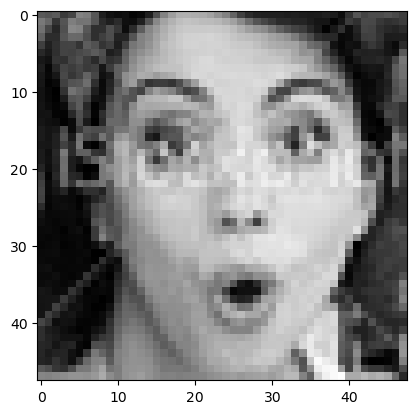

In [59]:
image = 'images/images/validation/surprise/2195.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of natural
1/1 [==============================] - 0s 41ms/step
model prediction is  neutral


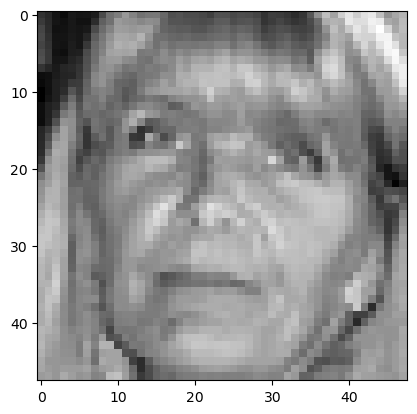

In [60]:
image = 'images/images/validation/neutral/1675.jpg'
print("original image is of natural")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [31]:
video_capture = cv2.VideoCapture(0)

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Only process every other frame of video to save time
    if ret:
        # Resize frame of video to 1/4 size for faster face recognition processing
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        
        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
    
    
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
            


    # Display the results
    for (top, right, bottom, left) in face_locations:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4
        
        croped_img = frame[top: bottom, left:right,::-1]
        grayscale_img = cv2.cvtColor(croped_img, cv2.COLOR_BGR2GRAY)
        
        reshaped_img = cv2.resize(grayscale_img, (48, 48))
        reshaped_img = reshaped_img[:, :, np.newaxis]
        reshaped_img = reshaped_img[np.newaxis, :, :, :]
        face_img = reshaped_img/255
        
        
        
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (196, 140, 100), 2)
        

        pred = model.predict(face_img)
        pred_label = label[pred.argmax()]
        

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (150, 120, 120), cv2.FILLED)
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(frame, pred_label, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

        


    # Display the resulting image
    cv2.imshow('Video', frame)
    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
[(70, 117, 113, 74)]
(1, 48, 48, 1)


In [34]:
plt.imshow(face_img.reshape(48,48))